# Student Alcohol Consumption

## Introduction
In this project, I want to consider the impact of various factors on alcohol consumption by students, as well as the impact of alcohol consumption on student academic performance.
Here is a transcript of each of the values:
### 1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - size of the family (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - commute to school time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - number of teaching hours (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of class failures in the past (numeric: n if 1<=n<3, else 4)
16. schoolsup - if student have a scholarship (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extracurricular activities (binary: yes or no)
20. nursery - if student attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first semester grade (numeric: from 0 to 20)
32. G2 - second semester grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

In [82]:
# !pip install pandas
# !pip install numpy
# !pip install plotly
# !pip install scipy
# !pip install pytelegrambotapi
# !pip install python-telegram-bot
!pip install streamlit
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
#import telebot
#from telebot import types
import logging
import streamlit as st
#from telegram.ext import (CommandHandler, ConversationHandler, Filters,
#                          MessageHandler, Updater)
#from telegram import ReplyKeyboardMarkup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 3.5 MB/s 
     |████████████████████████████████| 182 kB 76.8 MB/s 
     |████████████████████████████████| 4.7 MB 59.3 MB/s 
     |████████████████████████████████| 164 kB 62.2 MB/s 
     |████████████████████████████████| 237 kB 53.6 MB/s 
     |████████████████████████████████| 78 kB 7.0 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 51 kB 7.0 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=1409485deccf030e9561d2faf31892202053c2cfcbaa3cf034049c9703e9c35a
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators


### Let's see what data we will work with.

In [83]:
alcohol = pd.DataFrame(pd.read_csv('/content/student-mat.csv', sep=','))
alcohol

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


## Data cleanup

### As we can see, the information presented in the table is complete and does not require cleaning

In [84]:
alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Data transformation

##### Here I am adding 3 columns, with each  I will work with in the futher.
1. I normalized the average alcohol consumption of a person for a week (the original dataset contains 2 columns Walk and Walk), that is, alcohol consumption on weekends and working days. I combined them into one Alc column by adding and dividing by 2 (this will give us the average value).
2. I normalized the average amount of time spent studying, that is, I added the studytime parameter with a weight of 1 and the traveltime parameter with a weight of 0.1, since in the original dataset, the time spent on studying is considered 10 times more than the time spent on a trip to an educational institution. For example, to get 5 points for studies, a person must study 10 or more hours a week, and to get 5 points for the traveltime parameter, a person must spend 1 hour or more per week on a trip to an educational institution.
3. Finally, I changed the binary F and M in the sex column to 1 and 0.

In [85]:
alcohol = alcohol.assign(Alc = (alcohol.Dalc + alcohol.Walc)/2)
alcohol = alcohol.assign(AllStudytime = (alcohol.studytime + alcohol.traveltime*0.1))
alcohol.sex = alcohol.sex.apply([lambda x: 0 if x == 'F' else 1])
pd.set_option('display.max_columns', None)
alcohol

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Alc,AllStudytime
0,GP,0,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,1.0,2.2
1,GP,0,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1.0,2.1
2,GP,0,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,2.5,2.1
3,GP,0,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,1.0,3.1
4,GP,0,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,1.5,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,1,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,4.5,2.1
391,MS,1,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,3.5,1.2
392,MS,1,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,3.0,1.1
393,MS,1,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,3.5,1.3


## Descriptive statistics 

In [86]:
print(f'Shape of the dataset: {alcohol.shape[0]} rows by {alcohol.shape[1]} columns')

Shape of the dataset: 395 rows by 35 columns


In [87]:
print('Number of girls:', alcohol[alcohol['sex']==0].shape[0])
print('Number of boys:', alcohol[alcohol['sex']==1].shape[0])

Number of girls: 208
Number of boys: 187


In [88]:
print('Number of people with internet at home:', alcohol[alcohol['internet']=='yes'].shape[0])
print('Number of people without internet at home:', alcohol[alcohol['internet']=='no'].shape[0])

Number of people with internet at home: 329
Number of people without internet at home: 66


In [89]:
print('Number of people of age 15:', alcohol[alcohol['age']==15].shape[0])
print('Number of people of age 16:', alcohol[alcohol['age']==16].shape[0])
print('Number of people of age 17:', alcohol[alcohol['age']==17].shape[0])
print('Number of people of age 18:', alcohol[alcohol['age']==18].shape[0])
print('Number of people of age 19:', alcohol[alcohol['age']==19].shape[0])
print('Number of people of age 20:', alcohol[alcohol['age']==20].shape[0])
print('Number of people of age 21:', alcohol[alcohol['age']==21].shape[0])
print('Number of people of age 22:', alcohol[alcohol['age']==22].shape[0])

Number of people of age 15: 82
Number of people of age 16: 104
Number of people of age 17: 98
Number of people of age 18: 82
Number of people of age 19: 24
Number of people of age 20: 3
Number of people of age 21: 1
Number of people of age 22: 1


In [90]:
alcohol_anal = alcohol[['age', 'Alc','G3','famrel','freetime']].describe().drop(['25%','50%','75%'])
alcohol_anal

,age,Alc,G3,famrel,freetime
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,1.886076,10.415190,3.944304,3.235443
std,1.276043,0.992195,4.581443,0.896659,0.998862
min,15.000000,1.000000,0.000000,1.000000,1.000000
max,22.000000,5.000000,20.000000,5.000000,5.000000


In [91]:
alcohol_med = [['median', alcohol['age'].median(), alcohol['Alc'].median(), alcohol['G3'].median(), alcohol['famrel'].median(), alcohol['freetime'].median()]]
alcohol_mediana = pd.DataFrame(alcohol_med, columns=['value', 'age', 'Alc', 'G3', 'famrel', 'freetime'])
alcohol_mediana

,value,age,Alc,G3,famrel,freetime
0,median,17.0,1.5,11.0,4.0,3.0


### Let's look at some average values from the dataset.
1. We can see that the average age of respondents is 17 years old. There is also a significant deviation of 1.28 points, which means that we also have a lot of 16 and 18-year-old students (we will check this later).
2. It may seem strange but alcohol consumption is relatively small, only 1.88 points out of 5, which means that most students consume little alcohol but again we see a large variance that reached 1.29 points.
3. At the same time, we can see that most of the people who passed the survey, studied well, anyway, the spread of the value is very big (4.58 points).
4. We can also see that most students have good family relations (3.94 points out of 5), but again we see a large variance of 0.9 points).
5. We can also see that the majority of respondents have a lot of free time, since the average value is 4 (out of 5) and the deviation relatively small, only 1 point. In the future, it is worth checking the correlation of free time and alcohol consumption.

# Overview

Let's look at the simple pie chart 'Internet conection of the respondents', the bar chart 'Number of people of each age' and the more complex bar chart 'Exam grades' with a trend line and also the line chart 'Alcohol consumption'

In [92]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=alcohol['Alc'].value_counts().sort_index().index, y=alcohol['Alc'].value_counts().sort_index()))
fig.update_layout(
    title="Alcohol consumption",
    title_x = 0.5,
    xaxis_title="Frequency of alcohol consumption by respondents",
    yaxis_title="Number of the respondents",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0),
bargap=0.2)
fig.show()

In [93]:
df = alcohol.sex
number_of_people_with_and_without_internet = [alcohol[alcohol['internet']=='yes'].shape[0], alcohol[alcohol['internet']=='no'].shape[0]]
names_of_the_values = ['Number of people with internet at home','Number of people without internet at home']
fig = px.pie(df, values = number_of_people_with_and_without_internet, names = names_of_the_values)
fig.update_layout(
    title="Distribution of people by internet connection",
    title_x = 0.5,
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [94]:
data = alcohol.age
number_of_people_of_age = [alcohol[alcohol['age']==15].shape[0], alcohol[alcohol['age']==16].shape[0], alcohol[alcohol['age']==17].shape[0], alcohol[alcohol['age']==18].shape[0], alcohol[alcohol['age']==19].shape[0], alcohol[alcohol['age']==20].shape[0], alcohol[alcohol['age']==21].shape[0], alcohol[alcohol['age']==22].shape[0]]
names_of_the_values = ['Number of people of age 15','Number of people of age 16', 'Number of people of age 17','Number of people of age 18', 'Number of people of age 19','Number of people of age 20', 'Number of people of age 21','Number of people of age 22']
fig = px.bar(data, y= number_of_people_of_age,x = names_of_the_values,  color = names_of_the_values)
fig.update_layout(
    title="Distribution of people by age",
    title_x = 0.5,
    #xaxis.set_visible(False),
    xaxis_title="Age of the respondents",
    yaxis_title="Number of the respondents",
    legend=dict(x=.5, xanchor="center", orientation="h", bgcolor = 'aqua'),
    margin=dict(l=0, r=0, t=30, b=0),
    bargap=0.1
    )
fig.update_xaxes(visible=False)
fig.show()

In [95]:
fig = go.Figure(data=[go.Histogram(x=alcohol['G3'], name = 'number of people who recieved each grade',marker=dict(color="LightSeaGreen"))])

smoothTrace = {
            'type' : 'scatter',
            'mode' : 'lines',
            'x' : alcohol['G3'].value_counts().sort_index().index,
            'y' : alcohol['G3'].value_counts().sort_index(),
            'line': {'shape': 'spline', 'smoothing': 1.3}
            
            }

fig.add_trace(go.Scatter(smoothTrace, name = 'trade line'))
fig.update_layout(
    title="The number of people who received each grade",
    title_x = 0.5,
    xaxis_title="English exam grade of the respondents",
    yaxis_title="Number of the respondents",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0),
    bargap=0.1)
#fig.update_traces(line_color='#0000ff', line_width=5)
#fig.update_traces(marker_line_color='green', selector=dict(type='histogram'))
#plt.fig(color='green')
fig.show()

## More detailed overview

In this part I will look at correlations and build complex graphs. However, I will build complex graphs only for those quantities for which there is a significant correlation.
You should familiarize yourself with the correlation values:
Correlation                   Connection
0.00 - 0.24                     very weak connection
0.24 - 0.49                     average connection
0.49 - 0.75                     strong connection
0.75 - 1.00                     very strong connection

I decided to divide the correlation coefficients into two subtypes: positive and negative. And also distribute them in descending order.

### Positive correlations

Let's look at the correlation of free time and alcohol consumption.
My guess is that the more you go out with friends, the more you drink.

In [96]:
print(np.corrcoef(alcohol['Alc'], alcohol['goout'])[0,1])

0.39268293815918065


,Alc,failures,absences,age,health,sex,goout
Alc,1.000000,0.153203,0.138687,0.134972,0.094662,0.298331,0.392683
failures,0.153203,1.000000,0.063726,0.243665,0.065827,0.044436,0.124561
absences,0.138687,0.063726,1.000000,0.175230,-0.029937,-0.066962,0.044302
age,0.134972,0.243665,0.175230,1.000000,-0.062187,-0.028606,0.126964
health,0.094662,0.065827,-0.029937,-0.062187,1.000000,0.143588,-0.009577
sex,0.298331,0.044436,-0.066962,-0.028606,0.143588,1.000000,0.075897
goout,0.392683,0.124561,0.044302,0.126964,-0.009577,0.075897,1.000000


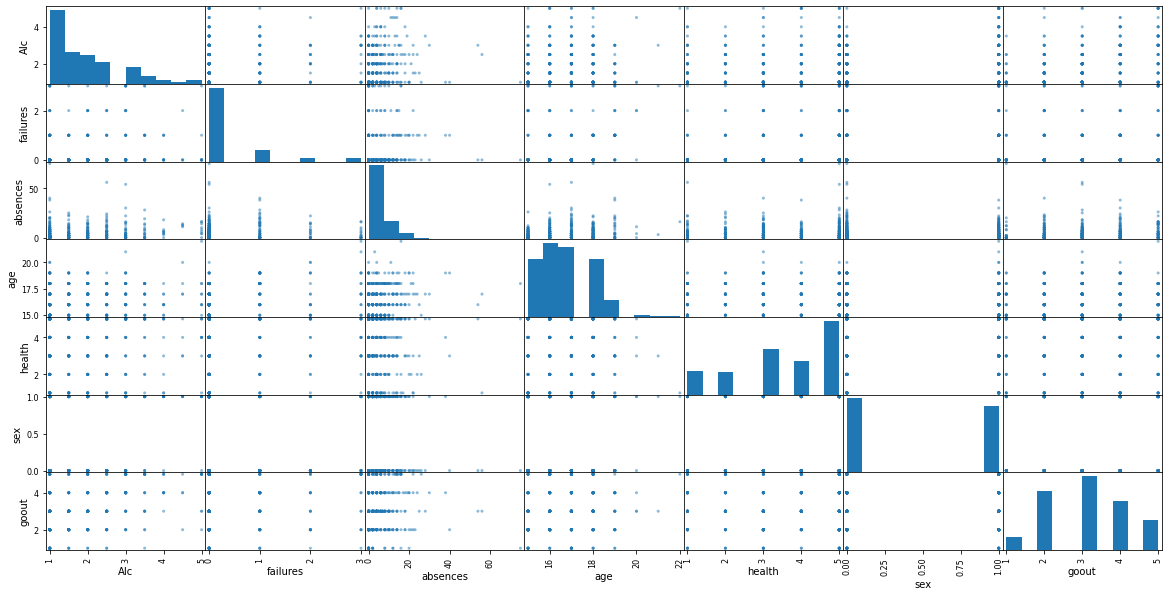

In [97]:
data_corr = pd.DataFrame(data = alcohol, columns = ['Alc','failures','absences','age','health','sex','goout'])
display(data_corr.corr())
pd.plotting.scatter_matrix(data_corr, figsize=(20, 10)) 
plt.show()

Hooray! There is a correlation and it is quite strong, let's visualize it!

In [98]:
small_free_time1 = alcohol['freetime'] < 3
much_free_time1 = alcohol['freetime'] >= 3
small_free_time = alcohol[small_free_time1]
much_free_time= alcohol[much_free_time1]
fig = go.Figure()
fig.add_trace(go.Bar(x = small_free_time['Alc'].value_counts().sort_index().index, y=small_free_time['Alc'].value_counts().sort_index(), name = 'people with less free time'))
fig.add_trace(go.Bar(x = much_free_time['Alc'].value_counts().sort_index().index, y=much_free_time['Alc'].value_counts().sort_index(), name = 'people with much free time'))
fig.update_layout(barmode='stack',
                  title="The consumption of the alcohol for people with much and less free time",
                  title_x = 0.5,
                  xaxis_title="Frequency of alcohol consumption by the respondents",
                  yaxis_title="Number of the respondents",
                  legend=dict(x=.5, xanchor="center", orientation="h"),
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

The resulting graph shows that alcohol consumption increases with the increase in the number of parties with friends. This may be due to the fact that students like to drink in the company, and accordingly fall into the drinking company, with which they often go to bars and clubs.

Let's look at the correlation between sex and the degree of alcohol consumed.

In [99]:
print(np.corrcoef(alcohol['Alc'], alcohol['sex'])[0,1])

0.29833067512276124


Let's look at alcohol consumption among men and women separately. I will assume that men drink alcohol more than women.

In [100]:
female1 = alcohol['sex'] == 0
male1 = alcohol['sex'] > 0
female = alcohol[female1]
male = alcohol[male1]

fig = go.Figure()
fig.add_trace(go.Histogram(x=male['Alc'], name = 'men',marker=dict(color="#082567")))
fig.add_trace(go.Histogram(x=female['Alc'], name = 'women',marker=dict(color="#ffd800")))
fig.update_layout(title="The consumption of the alcohol of men and women",
                  title_x = 0.5,
                  xaxis_title="Frequency of alcohol consumption by the respondents",
                  yaxis_title="Number of the respondents",
                  legend=dict(x=.5, xanchor="center", orientation="h"),
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

The resulting graph confirms my assumption. This may be related to the biological and psychological characteristics of people of different sexes.
Let's look at the correlation between alcohol and the amount of free time. My guess is that the more free time you have, the more you drink.

In [101]:
print(np.corrcoef(alcohol['Alc'], alcohol['freetime'])[0,1])

0.18975354724025528


And indeed, there is a fairly strong correlation.  This may be due to the fact that people simply have nothing to occupy themselves with, and taking alcohol becomes their main entertainment.

Other correlations are too insignificant (they are given below), so it makes no sense to consider them further in the project.

In [102]:
print(np.corrcoef(alcohol['Alc'], alcohol['failures'])[0,1]) #correlation of the amount of alcohol consumed and failures

0.15320332600501818


In [103]:
print(np.corrcoef(alcohol['Alc'], alcohol['absences'])[0,1]) #correlation of the amount of alcohol consumed and abscences

0.13868747915571566


In [104]:
print(np.corrcoef(alcohol['Alc'], alcohol['age'])[0,1]) #correlation of the amount of alcohol consumed and age

0.1349722736951083


In [105]:
print(np.corrcoef(alcohol['Alc'], alcohol['health'])[0,1]) #correlation of the amount of alcohol consumed and health

0.09466236164645639


### Trivial, but interesting things in visualization

Everyone thinks that girls study better than boys, let's check it out!

In [106]:
female1 = alcohol['sex'] == 0
male1 = alcohol['sex'] > 0
female = alcohol[female1]
male = alcohol[male1]
fig = go.Figure()
fig.add_trace(go.Scatter(x=male['AllStudytime'].value_counts().sort_index().index, y=male['AllStudytime'].value_counts().sort_index(),name = 'men', mode='lines+markers', line=dict(color="#082567")))
fig.add_trace(go.Scatter(x=female['AllStudytime'].value_counts().sort_index().index, y=female['AllStudytime'].value_counts().sort_index(),name = 'women',mode='lines+markers',line=dict(color="#ffff00")))
fig.update_layout(
    title="Study time of men and women",
    title_x = 0.5,
    xaxis_title="Frequency of alcohol consumption by the respondents",
    yaxis_title="Number of the respondents",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0),
bargap=0.2)
fig.show()

Indeed, girls study more than boys (this can be seen by the fact that the red line is almost always higher than the blue one, which means that on average the amount of time spent studying is more). This can again be explained by the biological and physiological differences of both sexes.

### Negative correlations

Let's look at the correlation between the amount of alcohol consumed and the time spent studying. I think the more you study, the less alcohol you consume.

In [107]:
print(np.corrcoef(alcohol['Alc'], alcohol['AllStudytime'])[0,1])

-0.2414974010053242


,Alc,failures,absences,age,health,sex,AllStudytime
Alc,1.000000,0.153203,0.138687,0.134972,0.094662,0.298331,-0.241497
failures,0.153203,1.000000,0.063726,0.243665,0.065827,0.044436,-0.166721
absences,0.138687,0.063726,1.000000,0.175230,-0.029937,-0.066962,-0.064093
age,0.134972,0.243665,0.175230,1.000000,-0.062187,-0.028606,0.001740
health,0.094662,0.065827,-0.029937,-0.062187,1.000000,0.143588,-0.075365
sex,0.298331,0.044436,-0.066962,-0.028606,0.143588,1.000000,-0.302801
AllStudytime,-0.241497,-0.166721,-0.064093,0.001740,-0.075365,-0.302801,1.000000


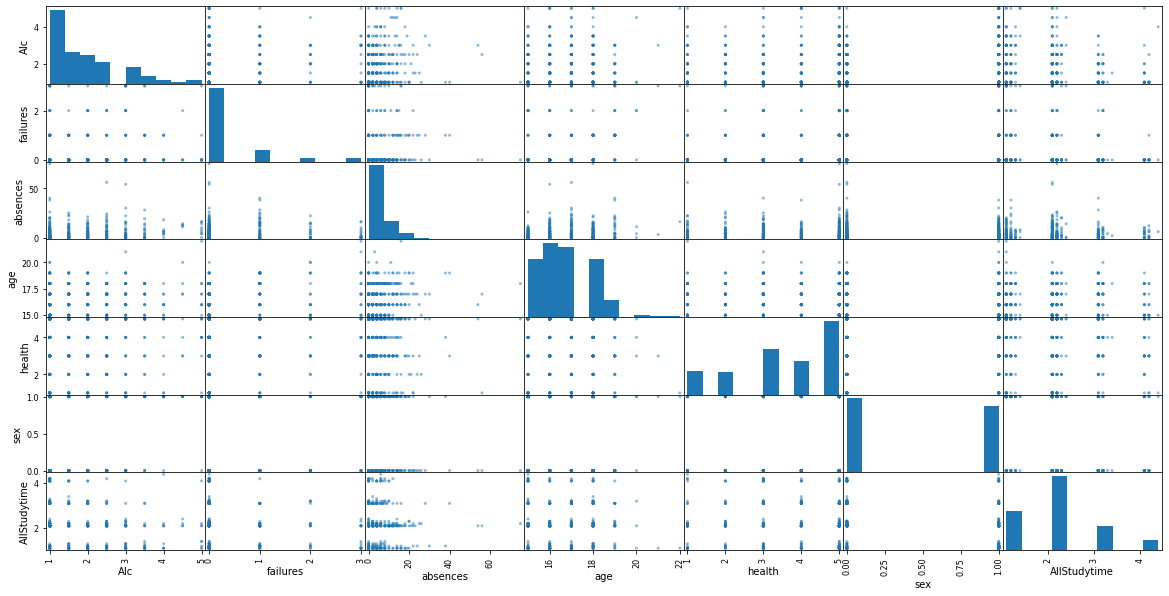

In [108]:
data_corr = pd.DataFrame(data = alcohol, columns = ['Alc','failures','absences','age','health','sex','AllStudytime'])
display(data_corr.corr())
pd.plotting.scatter_matrix(data_corr, figsize=(20, 10)) 
plt.show()

Indeed, there is a rather strong negative correlation. Let's look at the visualization.

In [109]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=alcohol['Alc'].value_counts().sort_index().index, y=alcohol['Alc'].value_counts().sort_index(),name = 'alcohol' ))
fig.add_trace(go.Scatter(x=alcohol['AllStudytime'].value_counts().sort_index().index, y=alcohol['AllStudytime'].value_counts().sort_index(),name = 'study' ))
fig.update_layout(
    title="Alcohol consumption",
    title_x = 0.5,
    xaxis_title="Frequency of alcohol consumption and time spent studying by respondents",
    yaxis_title="Number of the respondents",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0),
bargap=0.2)
fig.show()

This correlation quite logical, the more you study => the less free time => the less time for partying with friends. All other correlations are insignificant.

The remaining correlations are insignificant, their coefficient is much lower than 0.24.

In [110]:
print(np.corrcoef(alcohol['Alc'], alcohol['famrel'])[0,1]) #correlation between alcohol and family relationships

-0.10842656102734968


In [111]:
print(np.corrcoef(alcohol['Alc'], alcohol['Medu'])[0,1]) #correlation between alcohol and mother's education

-0.021680770118500677


In [112]:
print(np.corrcoef(alcohol['Alc'], alcohol['Fedu'])[0,1]) #correlation between alcohol and father's education

-0.007126501283078697


## A main hypothesis check

My hypothesis is that I believe that a lot of free time for girls and a lot of partying with friends lead to increase in alcohol consumption. I chose these values because they are the ones that are most positively correlated with alcohol: sex, amount of free time and hanging out with friends.

In [113]:
female1 = alcohol['sex'] == 0
male1 = alcohol['sex'] > 0
female = alcohol[female1]
male = alcohol[male1]

fig = go.Figure(data=[go.Mesh3d(x=female['goout'],
                   y=female['freetime'],
                   z=female['Alc'],
                   opacity=0.5,
                   color='deeppink')])


fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[0,5],),
                     yaxis = dict(nticks=4, range=[0,5],),
                     zaxis = dict(nticks=4, range=[0,5],),),
    width=1000,
    margin=dict(r=20, l=10, b=10, t=10),
    title="Correlation between free time, goouts and frequency of alcohol consumption",
    title_x = 0.5,
    xaxis_title="goouts",
    yaxis_title="freetime",
    legend=dict(x=.5, xanchor="center", orientation="h"),
)
fig.show()


We can see that the graph has the shape of a mountain with a peak at point (5,5,5) (almost perfect correlation), which confirms our hypothesis: alcohol consumption is maximal at the point where other parameters are maximal. The irregularities of this mountain can be explained by insufficient sampling, if it were larger, the graph would have the shape of a triangle with a vertex at the same point.

## Web interface

### Telegram bot

You can find bot by this link t.me/Alcash1bot

In [ ]:
logging.basicConfig(filename='bot.log', level=logging.INFO) 

def dialog_sex(update, context):
    reply_keyboard = [['Мужской'], ['Женский']]
    update.message.reply_text(
        'Пожалуйста, выберите ваш пол:',
        reply_markup=ReplyKeyboardMarkup(
            reply_keyboard, one_time_keyboard=True)
    )

    return 'time'


def dialog_time(update, context):
    sex = update.message.text
    if sex == 'Мужской':
        context.user_data['dialog'] = {'sex': 1}
    elif sex == 'Женский':
        context.user_data['dialog'] = {'sex': 0}
    update.message.reply_text(
        'Сколько у вас свободного времени по шкале от 1 до 5?',
        reply_markup=digits_keyboard()
    )

    return "friends"


def dialog_friends(update, context):
    context.user_data['dialog']['time'] = int(update.message.text)
    update.message.reply_text(
        'По шкале от 1 до 5 – как часто вы встречаетесь с друзьями?',
        reply_markup=digits_keyboard()
    )

    return 'ending'


def dialog_ending(update, context):
    context.user_data['dialog']['friends'] = int(update.message.text)
    sex = context.user_data['dialog']['sex'] 
    free_time = context.user_data['dialog']['time']
    times_with_friends = context.user_data['dialog']['friends']

    result = (times_with_friends * 9) + (free_time * 9) + 10 * sex 

    update.message.reply_text(
        f'Риск подверженности алкоголизму {result}%!',
        reply_markup=main_keyboard()
    )

    return ConversationHandler.END


def dialog_dontknow(update, context):
    update.message.reply_text(
        'Кажется, вы прислали мне что-то не то!'
    )

def main_keyboard():
    return ReplyKeyboardMarkup(
        [['Посчитать степень алкоголизма']]
    )


def digits_keyboard():
    return ReplyKeyboardMarkup(
        [['1', '2', '3', '4', '5']]
    )

def greet_user(update, context): 
    user = update.effective_user
    update.message.reply_text(
        f'Привет, {user.first_name}! Если хочешь узнать степень своего алкоголизма, просто напиши мне «Посчитать степень алкоголизма»',
        reply_markup=main_keyboard()
    )


def main():
    mybot = Updater('5807673465:AAHGUxfVfoH7SyrBkablRY8nmYhEhbnMB8w')
    dp = mybot.dispatcher

    dialog = ConversationHandler(
        entry_points=[MessageHandler(Filters.regex(
            '^(Посчитать степень алкоголизма|посчитать степень алкоголизма)$'),
            dialog_sex)],
        states={'time': [MessageHandler(Filters.regex(
            '^(Мужской|Женский)$'), dialog_time)],
                'friends': [MessageHandler(Filters.regex(
                    '^(1|2|3|4|5)$'), dialog_friends)],
                'ending': [MessageHandler(Filters.regex(
                    '^(1|2|3|4|5)$'), dialog_ending)]},
        fallbacks=[MessageHandler(Filters.text | Filters.video |
                   Filters.photo | Filters.document |
                   Filters.location | Filters.attachment, dialog_dontknow)])

    dp.add_handler(dialog)
    dp.add_handler(CommandHandler("start", greet_user))

    logging.info("Бот стартовал")
    mybot.start_polling()
    mybot.idle()


if __name__ == "__main__":
    main()